## Overview

The purpose of this notebook is to train a neural network that is able to classify images to its correct category. We'll use the **[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)** dataset, which contains 70,000 grayscale images of individual clothing articles divided into 10 different categories (each image is 28 x 28 pixels).

![Example of Fashion MNIST](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [0]:
#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Import numpy, matplotlib and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Check TensorFlow and keras versioning to make sure we have the latest and greatest
print(tf.__version__)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [0]:
#Import the dataset directly from TensorFlow
fashion_mnist = keras.datasets.fashion_mnist

#Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explore the Data
From the 70,000 images, we will use 60,000 images for training and the remaining 10,000 for inference.

-  The *train_images* and *train_labels* are NumPy arrays that belong to the training set that the model uses to learn
-  The model is then put to the test by doing inference on the *test_images* and *test_labels* NumPy arrays

Furthermore, we'll also need to assign a numerical value to each category of clothing called class (shown below). Each image corresponds to a **single** label. Since the class names are not provided, we'll need to create a vector that contains the class names.

![Labels](https://pravarmahajan.github.io/assets/images/fashion-MNIST/labels_table.png)

In [0]:
#Create the class names manually since it's not included in the dataset
class_names = ["T-shirt/top", "'Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#Quick check
print(class_names)

['T-shirt/top', "'Trouser", 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
#Shape of the training image shows there are 60,000 images each represented as 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [0]:
#Should also have 60,000 labels for the training set
len(train_labels)

60000

In [0]:
#The 1st image of our training dataset has a label of 9, which corresponds to "Ankle Boot"
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
#Same thing, but with test/validation set
test_images.shape

(10000, 28, 28)

In [0]:
#10,000 labels in the test set
len(test_labels)

10000

## Data Pre-Processing
Before any training can be done, we need to pre-process the data to normalize the varying degrees of pixel values. It's important to note that both the *training* and *test* set need to be normalized in the same fasion.

In the MNIST dataset, pixel values fall in the range of [0, 255]. To normalize means we will turn each pixel value into a value that's between [0, 1]. For each pixel value, we take $$N_i = \frac{x_j - min(x)}{max(x) - min(x)}$$ where $N_i$ is the $i^{th}$ normalized data and $x^i$ is the $j^{th}$ raw data. 

You can see that the pixel value for each image falls between 0 and 255 in output below. Thus, we'll go ahead and normalize the pixel values based on the equation above. I've also included an image just to show that each image is indeed 28 x 28 as well as the 

In [0]:
#Max and min pixel values of the training set
max_train = np.amax(train_images)
min_train = np.amin(train_images)

#Max and min pixel values of the test set
max_test = np.amax(test_images)
min_test = np.amin(test_images)

print(str("Training set pixel range:"), min_train, str(","), max_train)
print(str("Test set pixel range:"), min_test, str(","), max_test)

Training set pixel range: 0 , 255
Test set pixel range: 0 , 255


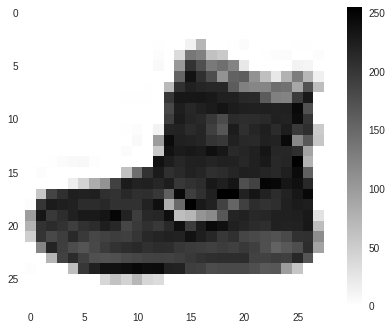

In [0]:
#Displays the 1st image in the training set; looks like a sneaker or a boot
plt.figure()
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.show()

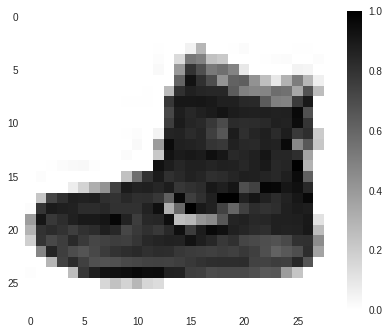

In [0]:
#Normalize both the training and test set
train_images = (train_images - min_train) / (max_train - min_train)
test_images = (test_images - min_test) / (max_test - min_test)

#Displays the 1st normalized image in the training set
plt.figure()
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.show()

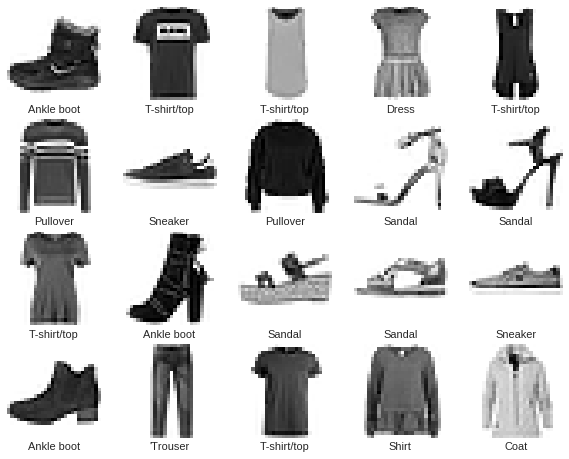

In [0]:
# Displays the 1st 20 images from the training set
plt.figure(figsize = (10, 10)) #Figure size are in inches
for i in range(20): #Number of images in the loop we want to display
    plt.subplot(5, 5, i+1) #Dimension for each image
    plt.xticks([]) #Removes all tick marks on the x-axis
    plt.yticks([]) #Removes all tick marks on the y-axis
    plt.imshow(train_images[i], cmap = plt.cm.binary) #Colormap used to map normalized values of the pixels to RGBA colors
    plt.xlabel(class_names[train_labels[i]]) #Adding labels to the i^th imag

## Model Building
Building a neural network requires us to configure the layers of the network and compile the model. 

### Define Network Architecture
There are 3 high-level layers in a neural network architecture:

1.  **Input layer:**These are the input variables that will be fed into the network; no computation is performed at this layer, nodes here just pass on the information(features) to the hidden layer
2. **Hidden layer:** Contain neurons that extract representations and meaning from the previous layer
3. **Output layer:** Gives the output (i.e. probability of an image belowing to a category) through an activation function (i.e. Recitified Linear Unit, Softmax)
    -  **Activation Functions** are very important in neural networks because they decide whether a neuron should be activated or whether the information that the neuron is receiving is relevant for the given information or should it be ignored. The activation function is the non-linear transformation that we do over the input signal, which is done by calculating the weighted sum of the input and adding bias with it. This transformed output is then sent to the next layer of our network as input. 

In [0]:
#Setting up 4 layers of our network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #Transforms 2D array into 1D array
    keras.layers.Dense(128, activation = tf.nn.relu),#1st hidden layer that consists of 128 nodes
    keras.layers.Dense(128, activation = tf.nn.relu),#2nd hidden layer that consists of 128 nodes
    keras.layers.Dense(10, activation = tf.nn.softmax) #output layer that returns the probability score for the 10 classes
])

#### Layer Explanation
-  **keras.layers.Flatten:** Transforms the original image from a 2D array of 28 x 28 pixels into a 1D array of 784 pixels (28 * 28). There is no learning involved here, just reformatting the data.
-  **keras.layers.Dense (ReLu):** This layer has 128 neurons or nodes. Additionally, we're using the Rectified Linear Unit (ReLu) activation function to calculate the weights that will be fed forward into the next layer. Mathmatically, ReLu is expressed: $$f(x) = max(0, x)$$ This means that the function returns 0 if it receives any negative, but for positive values $x$, it returns that value back. It's very fast and computationally efficient because it's implemented using simple thresholding. This also makes ReLu one of the most popular activation functions.
-  **keras.layers.Dense (Softmax):** Consist of 10 neurons that turns the vector of values from the previous layer into a probability distrbuiton over the 10 classes. In other words, each neuron contains a probability score that indicates the likelihood that the image belongs to one of the 10 classes. Mathmatically, it can be expressed as: ![](https://i.stack.imgur.com/iP8Du.png) where $y_i$ refers to each element in the vector (see example below for a quick side example of how Softmax function works). The sum of the probability should add up to 1. 

In [0]:
#Quick demo of how the Softmax function works mathmatically
vector = [3.0, 2.7, 1.4] #Let's pretend we have a vector of values named "vector"
exps = [np.exp(i) for i in vector] #computes exponetual value of each element in the vector (top part of the equation)
sum_of_all_exps = sum(exps) #sums up all of the transformed values
softmax = [j/sum_of_all_exps for j in exps] #computes the probability of each element in the original vector

print("Probability of each vector value:", softmax)
print("Sum of the probability:",sum(softmax))

Probability of each vector value: [0.5147436111393937, 0.38133144611156783, 0.10392494274903852]
Sum of the probability: 1.0


### Compile the Model
Before the model is ready for training, it needs a few more settings to be defined. Specifically, they're:
-  **Loss Function:** This measures how accurate the model is during training in which we look at our prediction/classification to the actual result/label. Our goal is to minimize this function to reach convergence in which the set of weights have minimized the errors. 
-  **Optimizer:** Determines how the weights get updated based on the training data and the loss function.
-  **Metrics:** Used to monitor the performance of our multi-class classifier. We're going to use accuracy as the key metric, which is the fraction of images that were correctly classified out of the 10,000 images in the test set. 

In [0]:
#Compile model using the 3 settings above
model.compile(loss = "sparse_categorical_crossentropy", #Because each target label is mapped to an integer; not 1-hot encoded
                 optimizer = "adam", #Extension to stochastic gradient descent; popular and effective
                 metrics = ["accuracy"]) #correctly classified images

## Model Training
We will train our neural network in the following steps:
1. Feed training images and labels (60,000)
2. Model extracts key features and learns to associate those key features with labels
3. Apply the candidate model to the test set and labels (10,000) to evaluate peformance

In [0]:
#Epochs mean when all training images have been processed once. 6 epochs means we're doing this 6 times
#Loss is just a fancy word for error; the lower, the better
model.fit(train_images, train_labels, epochs = 6)

Epoch 1/6
60000/60000 [==============================] - 10s 173us/step - loss: 0.4848 - acc: 0.8249
Epoch 2/6
60000/60000 [==============================] - 8s 141us/step - loss: 0.3622 - acc: 0.8673
Epoch 3/6
60000/60000 [==============================] - 8s 140us/step - loss: 0.3283 - acc: 0.8800
Epoch 4/6
60000/60000 [==============================] - 8s 141us/step - loss: 0.3063 - acc: 0.8873
Epoch 5/6
60000/60000 [==============================] - 8s 141us/step - loss: 0.2891 - acc: 0.8924
Epoch 6/6
60000/60000 [==============================] - 8s 140us/step - loss: 0.2738 - acc: 0.8980


## Evaluate Accuracy
Once the model is trained, we will apply it to the test set of 10,000 images that the neural network haven't seen before.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc, "Test loss:", test_loss)

10000/10000 [==============================] - 1s 53us/step
Test accuracy: 0.877 Test loss: 0.3473847457408905


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of _overfitting_. Overfitting is when the model performs worse on new data than on the training data.

## Inference

In [0]:
i = 2000 #i^th image in our test set that we want to predict
predict = model.predict(test_images) #define the predict function
predict[k] #predict the i^th image in our test set
predicted_class = class_names[np.argmax(predict[i])] #predict the i^th image in our test set & the class with the highest probability
actual_class = class_names[test_labels[i]] #actual class of the i^th image in our test set

print("Predicted", predicted_class)
print("Actual:", actual_class)

Predicted Bag
Actual: Bag


In [0]:
#Setting up the plot space
def plot_image(i, predict_array, true_label, img):
    predict_array, true_label, img = predict_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predict_array)
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100 * np.max(predict_array),
                                class_names[true_label]),
                                color = color)

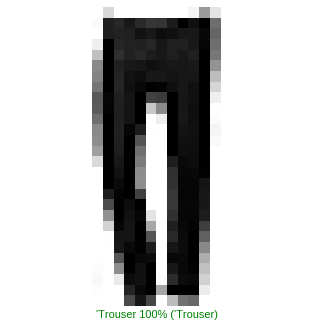

In [0]:
#Single image classification in the test set
#Correct predictions are in green, incorrect predictions are in red
i = 6588
plot_image(i, predict, test_labels, test_images)

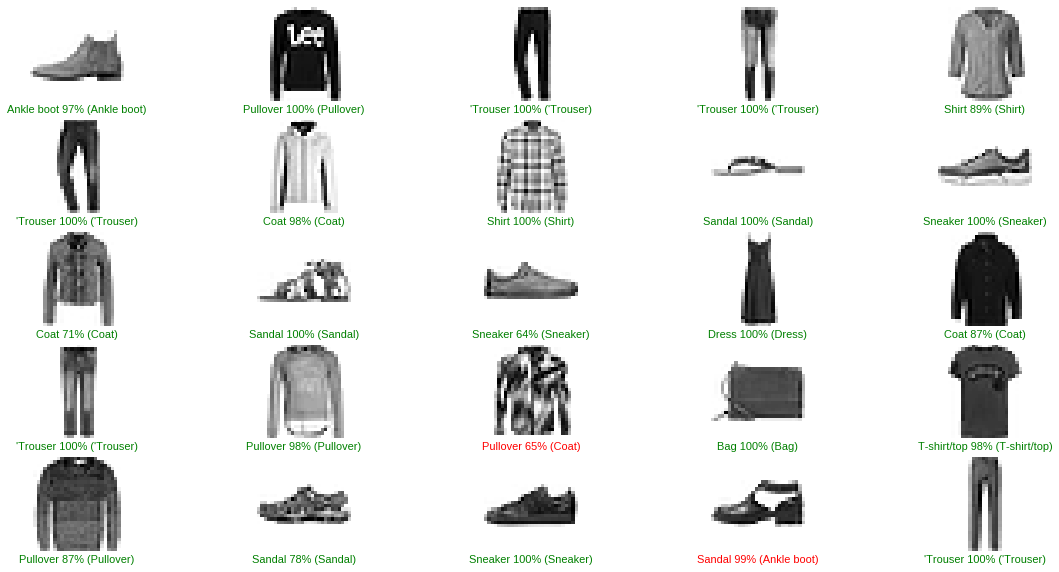

In [0]:
#Plots the first (num_rows * num_cols) images, their predicted label and the true label
#Correct predictions are in green, incorrect predictions are in red
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predict, test_labels, test_images)

As you can see, even images with high confidence could still be wrong. This is a good reminder that machine learning produces probablistic outcomes and one should always evaluate the cost of false/wrong predictions before applying it to business problems. 